# Content and Objective

+ Checking for (weak) stationarity
+ Several stochastic processes (sine, chirp) are sampled and their empirical acf is shown

# Import

In [1]:
# importing
import numpy as np
import shutil

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True if shutil.which('latex') else False)

matplotlib.rc('figure', figsize=(13, 6) )

# Random Sine Process

### Get Process and Correlate in Time Domain

In [3]:
# sampling time and observation time
t_s = 0.05
t_max = 5

# number of samples for normalizing
N_samples = int( t_max / t_s )

# vector of times and delays (for acf)
t = np.arange( 0, t_max + t_s, t_s )
tau_acf = np.arange( - t_max, t_max + t_s, t_s)
k_acf = np.arange(-N_samples, N_samples+1)

# fix frequency, get random amplitude and random phase
f_0 = 1
A = np.random.randn()
phi = 2 * np.pi * np.random.rand()

# get one realization of the process
X = A * np.sin( 2 * np.pi * f_0 * t + phi )

# get autocorrelation
acf = np.correlate( X, X , 'full') 

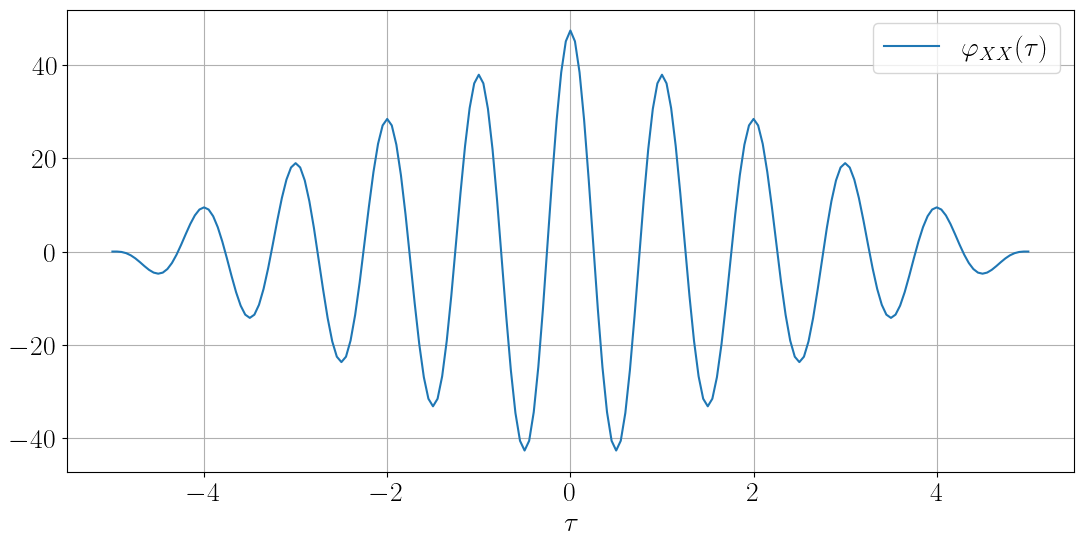

In [4]:
# plotting
plt.plot( tau_acf, acf, label=r'$\varphi_{XX}(\tau)$')

plt.grid(1)
plt.xlabel(r'$\tau$')
plt.legend(loc='upper right')
plt.show()

### Questions:

- Why are we observing a triangular-shaped acf?
- Why are we observing such a "strange" value of $\varphi_{XX}(0)$?
- Reason for the $\tau$ values used in the plot.

### Different Solution by Using Expectation instead of Time-Domain Correlation

In [5]:
# number of trials
N_trials = int( 1e3 )

# initialize acf
acf = np.zeros_like( tau_acf )

# fix frequency, get random amplitude and random phase
f_0 = 1
A = np.random.randn( N_trials )
phi = 2 * np.pi * np.random.rand( N_trials )

# loop for all delays and determine acf by expectation along realizations
for ind_tau, val_tau in enumerate( tau_acf ):
    
    # get acf
    corr = [ A[_n] * np.sin( 2 * np.pi * f_0 * t + phi[_n] ) 
             * A[_n] * np.sin( 2 * np.pi * f_0 * (t-val_tau) + phi[_n] ) 
             for _n in range(N_trials) 
            ] 
    
    acf[ ind_tau ] = np.sum( corr)  / N_trials / N_samples

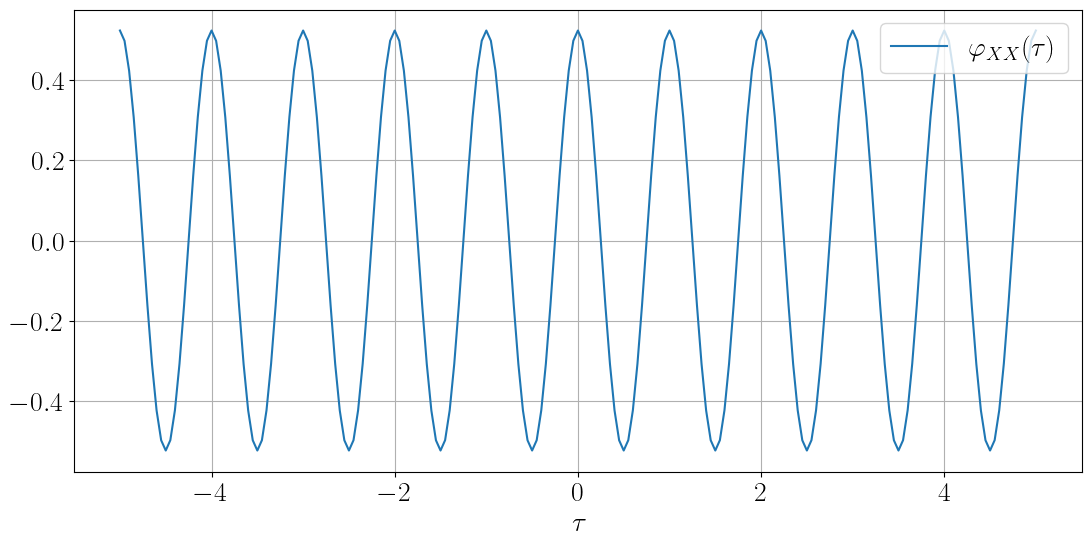

In [6]:
# plotting
plt.plot( tau_acf, acf, label=r'$\varphi_{XX}(\tau)$')

plt.grid(1)
plt.xlabel(r'$\tau$')
plt.legend(loc='upper right')
plt.show()

<b> Exercise:</b> Reason the value of $\varphi_{XX}(0)$.

### Showing the ACF in the $(t,t-\tau)$-Domain

<b>NOTE:</b> The ACF is given by $\varphi_{XX}(t, t-\tau)=\mathbb{E}\{X(t)X(t-\tau)\}$

In [7]:
N_trials = int( 1e3 )

# initialize empty two-dim array (t and tau)
acf_2d = np.zeros( ( len(t), len(tau_acf) ) )

# get frequency, random amplitude and random phase
f_0 = 1
A = np.random.randn( N_trials )
phi = 2 * np.pi * np.random.rand( N_trials )

# loop for all times
for ind_t, val_t in enumerate( t ):

    # loop for all delays
    for ind_tau, val_tau in enumerate( tau_acf ):

        # get acf at according index/time/delay
        corr = [ A[_n] * np.sin( 2 * np.pi * f_0 * val_t + phi[_n] ) 
                 * A[_n] * np.sin( 2 * np.pi * f_0 * (val_t-val_tau) + phi[_n] ) 
                 for _n in range(N_trials) 
               ]
        
        acf_2d[ ind_t, ind_tau ] = np.sum( corr ) / N_trials 

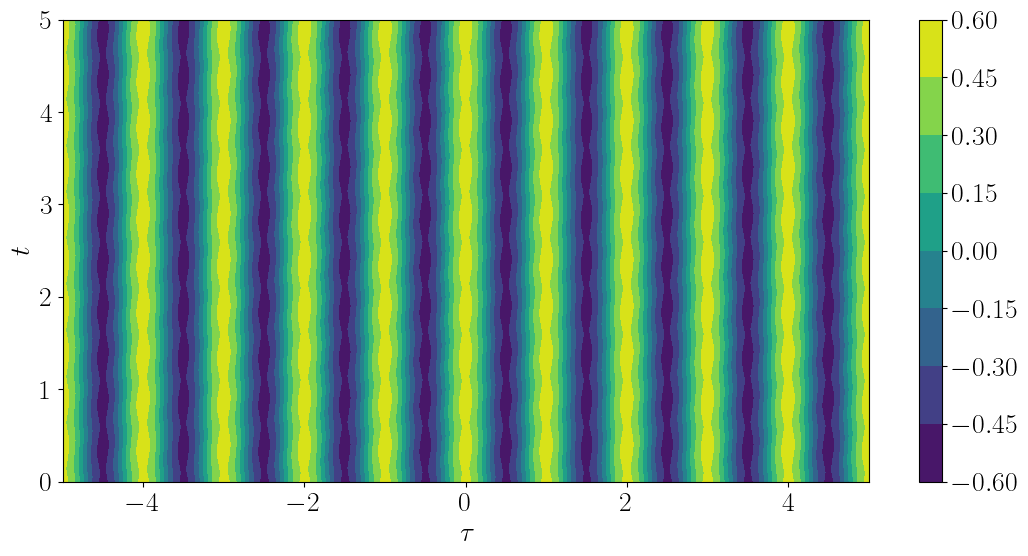

In [8]:
# parameters for meshing
T, Tau_acf = np.meshgrid( tau_acf, t )

# plotting
plt.contourf( T, Tau_acf , acf_2d[ : , : ] )

plt.xlabel('$\\tau$')
plt.ylabel('$t$')
plt.colorbar()
plt.show()
#plt.savefig('acf_sine.pdf', bbox_inches='tight')

# Now Looking at a Chirp

<b>Note:</b> A chirp describes a sinusoid with a frequency that, in this example, increases linearly with time.

### Is it stationary?

In [9]:
N_trials = int( 1e3 )

# initialize 
acf = np.zeros_like( tau_acf )

# get frequency, random amplitude and random phase
f_0 = 1
delta_f = .2

A = np.random.randn( N_trials )
phi = 2 * np.pi * np.random.rand( N_trials )

# loop for all delays
for ind_tau, val_tau in enumerate( tau_acf ):
    
    # get acf
    acf[ ind_tau ] = np.sum( [ 
                            A[_n] * np.sin( 2 * np.pi * ( f_0 + delta_f * t ) * t + phi[_n] ) 
                            * A[_n] * np.sin( 2 * np.pi * ( f_0 + delta_f * t )* (t-val_tau) + phi[_n] ) 
                            for _n in range(N_trials) 
                            ] ) / N_trials

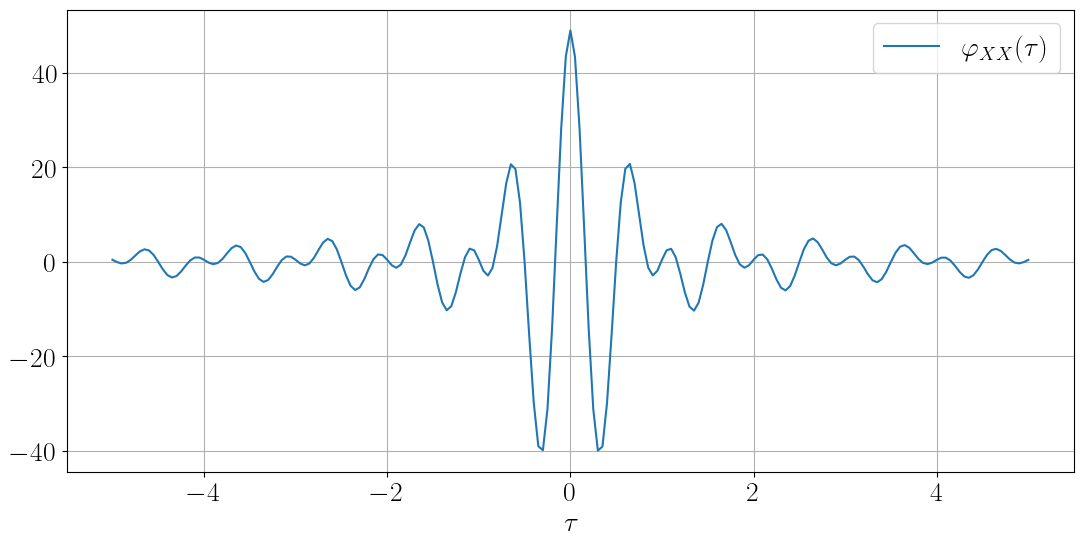

In [10]:
# plotting
plt.plot( tau_acf, acf, label='$\\varphi_{XX}(\\tau)$')

plt.grid(1)
plt.xlabel('$\\tau$')
plt.legend(loc='upper right')
plt.show()

<b>Remark:</b> ... depending on $\tau$, so everything is fine?!?

### Showing ACF of the Chirp in the $(t,\tau)$-Domain

In [11]:
# number of realizations
N_trials = int( 4e3 )

# initialize empty values for acf
acf_2d = np.zeros( ( len(t), len(tau_acf) ) )

# get frequency, random amplitude and random phase
f_0 = 1
A = np.random.randn( N_trials )
phi = 2 * np.pi * np.random.rand( N_trials )

# loop for all times
for ind_t, val_t in enumerate( t ):

    # loop for all delays
    for ind_tau, val_tau in enumerate( tau_acf ):

        # get acf
        acf_2d[ ind_t, ind_tau ] = np.sum( [ 
                                       A[_n] * np.sin( 2 * np.pi * ( f_0 + delta_f * val_t ) * val_t + phi[_n] ) 
                                       * A[_n] * np.sin( 2 * np.pi * ( f_0 + delta_f * val_t )* (val_t-val_tau) + phi[_n] ) 
                                       for _n in range(N_trials) 
                                        ] ) / N_trials

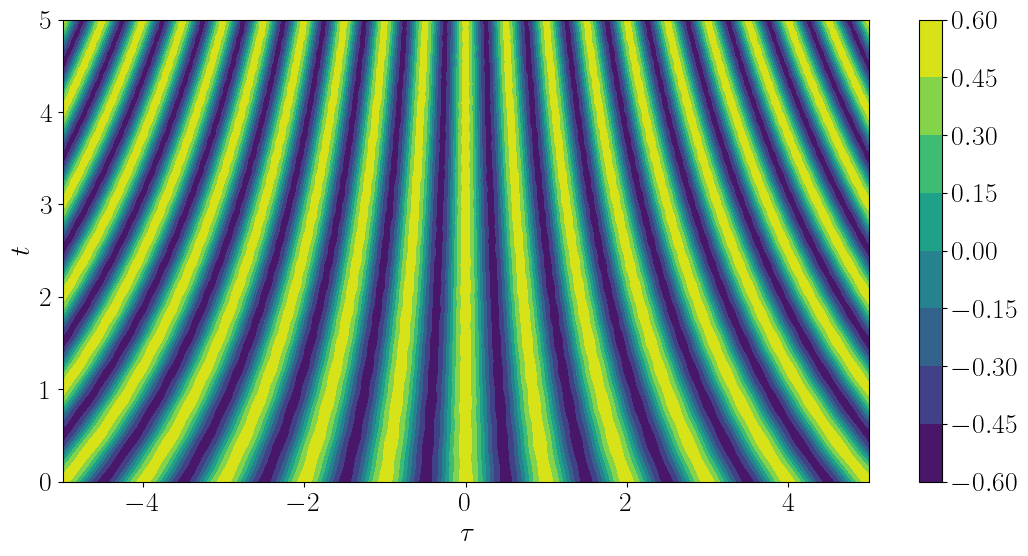

In [12]:
T, Tau_acf = np.meshgrid( tau_acf, t )

# plotting
plt.contourf( T, Tau_acf , acf_2d[ : , : ] )

plt.xlabel('$\\tau$')
plt.ylabel('$t$')
plt.colorbar()
plt.show()
#plt.savefig('acf_chirp.pdf', bbox_inches='tight')

### Questions:

Can you reason why this process is not stationary by
- ... looking at the last figure?
- ... thinking about signal definition?

Additionally: Can you explain why "the lines seem to converge" for increasing $t$?